<a href="https://colab.research.google.com/github/crislainesc/Aprendizado-de-Maquina-na-Pratica/blob/Atividade/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de insuficiência cardíaca**



*   Data set com informações clínicas que podem permitir a criação de um modelo capaz de prever a mortalidade por insuficiência cardíaca.
*   [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
*   12 características clínicas que podem prognosticar eventos de morte.
*   299 instâncias.

**Montando ambiente no Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**1. Importando Bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**2. Carregamento dos dados**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Semana 2/heart_failure.csv')

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**3. Limpeza e organização dos dados**

In [ ]:
data.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


O data set não possui dados faltantes ou que precisem serem transformados em valores númericos. Porém, existem fatores que não influenciam diretamente em um evento de morte por insufiência cardíaca e tais fatores podem diminuir a eficiência do modelo.

Sendo os fatores que diretamente contribuem para o evento de morte:

*   **Age (Idade)**: O avanço da idade pode contribuir para a má circulação sangínea no corpo.
*   **Anaemia (Anemia)**: redução na quantidade de hemoglobina, um pigmento presente nas células vermelhas capaz de carregar o oxigênio pelo organismo, no sangue circulante. Sendo assim, a capacidade de circulação do sangue será comprometida.
*   **Ejection Fraction (Fração de Ejeção)**: quando reduzida significa que os ventrículos do coração não se contraem adequadamente durante cada batimento cardíaco de modo que o sangue não é adequadamente bombeado para fora do coração.
*   **Time (Tempo):** o período de acompanhamento não influencia diretamente, todavia é muito importante para o modelo.
*   **Serum Creatinine (Creatinina Sérica)**: resíduo produzido pela quebra de uma proteína chamada creatina fosfato. Em níveis elevados, os rins trabalham de forma inadequada e a sua capacidade de filtrar o sangue fica afetada.


In [ ]:
# Excluindo as colunas que não serão necessárias por não influenciarem diretamente.
data = data.drop(columns=['creatinine_phosphokinase','platelets','serum_sodium','sex','smoking'])

**4. Re-escala dos dados**

In [ ]:
data = (data - data.min())/(data.max() - data.min())

**5. Organizando dados para modelagem**

In [ ]:
# Colando as colunas em ordem diferente
data = data[['DEATH_EVENT','age','anaemia','diabetes','ejection_fraction','high_blood_pressure','time','serum_creatinine',]]
# usando a função axis para que ela remova a coluna DEATH_EVENT
x = data.drop('DEATH_EVENT', axis = 1)
x.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,time,serum_creatinine
0,0.636364,0.0,0.0,0.090909,1.0,0.000000,0.157303
1,0.272727,0.0,0.0,0.363636,0.0,0.007117,0.067416
2,0.454545,0.0,0.0,0.090909,0.0,0.010676,0.089888
3,0.181818,1.0,0.0,0.090909,0.0,0.010676,0.157303
4,0.454545,1.0,1.0,0.090909,0.0,0.014235,0.247191


In [ ]:
y = data.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

**Dividindo os dados em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,time,serum_creatinine
137,0.509091,1.0,0.0,0.166667,0.0,0.370107,0.179775
97,0.545455,1.0,0.0,0.696970,0.0,0.288256,0.067416
203,0.363636,0.0,0.0,0.166667,1.0,0.651246,0.337079
268,0.090909,0.0,1.0,0.363636,0.0,0.854093,0.044944
10,0.636364,1.0,0.0,0.363636,1.0,0.021352,0.393258


In [ ]:
y_train.head()

137    0.0
97     0.0
203    0.0
268    0.0
10     1.0
Name: DEATH_EVENT, dtype: float64

**6. Definindo algoritmo de aprendizado**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
classifier.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
classifier = classifier.predict(x_test)
classifier

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0.])

**7. Avaliação do classificador**

Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, classifier)
round(accuracy,3)

0.833

Precisão

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(y_test, classifier)
round(precision,3)

0.706

Recall

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test, classifier)
round(recall, 3)

0.706

F1-score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, classifier)
round(f1,3)

0.706

**Curva ROC**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classifier)

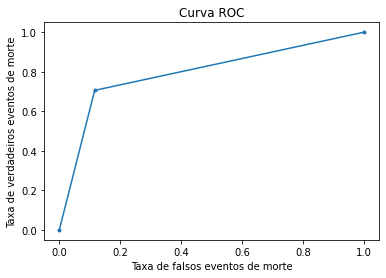

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.ylabel('Taxa de verdadeiros eventos de morte')
plt.xlabel('Taxa de falsos eventos de morte')
plt.show()

**Área sob a curva**

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc = roc_auc_score(y_test,classifier)
round(auc,3)

0.795

**Validação cruzada**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
scores = cross_val_score(classifier,x,y,cv=10)
scores

array([0.6       , 0.8       , 0.86666667, 0.83333333, 0.93333333,
       0.86666667, 0.9       , 0.86666667, 0.73333333, 0.68965517])

In [ ]:
round(scores.mean(),3),round(scores.std(),3)

(0.809, 0.099)

**8. Comparando MLP com árvore de decisão e random forest**

Validação cruzada

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree,x,y,cv=10)

In [ ]:
forest = RandomForestClassifier()
forest_scores = cross_val_score(forest,x,y,cv=10)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

In [ ]:
mlp_scores = cross_val_score(mlp,x,y,cv=10)

In [ ]:
print('Árvore de Decisão: ', round(tree_scores.mean(),3),round(tree_scores.std(),3))
print('Random Forest: ', round(forest_scores.mean(),3),round(forest_scores.std(),3))
print('MLP:', round(mlp_scores.mean(),3),round(mlp_scores.std(),3))

Árvore de Decisão:  0.679 0.148
Random Forest:  0.736 0.144
MLP: 0.816 0.095


**9. Otimização de parâmetros**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = [{'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'solver': ['lbfgs', 'sgd', 'adam'],
                'max_iter': [2000, 3000, 4000]}]

In [ ]:
mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
mlp.fit(x,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [ ]:
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 2000, 'hidden_layer_sizes': 10, 'activation': 'tanh'}


In [ ]:
print(round(mlp.best_score_,3))

0.792


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [53]:
mlp.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                

In [55]:
print(mlp.best_params_)

{'activation': 'identity', 'hidden_layer_sizes': 50, 'max_iter': 3000, 'solver': 'adam'}


In [56]:
print(mlp.best_score_)

0.805593220338983


In [57]:
mlp.cv_results_

{'mean_fit_time': array([0.01187   , 0.55305033, 0.36491971, 0.00920348, 0.50079346,
        0.3316442 , 0.00951767, 0.53492103, 0.34454098, 0.02256804,
        0.86741843, 0.37091093, 0.01719828, 0.90943956, 0.36557279,
        0.01721716, 0.91782784, 0.36926813, 0.02571559, 1.01897912,
        0.3466619 , 0.02459116, 1.02156534, 0.34411879, 0.02172871,
        1.04735456, 0.35181284, 0.0247551 , 0.56834593, 0.17289791,
        0.01645842, 0.5965692 , 0.15616355, 0.01870384, 0.62578187,
        0.17917542, 0.06966543, 1.24302416, 0.25294647, 0.05370345,
        1.34175577, 0.22824411, 0.0562839 , 1.30433044, 0.23599501,
        0.38353047, 0.0712904 , 0.78822975, 0.28631592, 0.05719762,
        0.75094738, 0.52227407, 0.05567436, 0.81404839, 0.48044734,
        0.06344848, 1.17606826, 0.4303339 , 0.05700164, 1.06788354,
        0.42516904, 0.06970735, 1.14314418, 0.78970938, 0.06887598,
        1.42477479, 0.74611206, 0.06638684, 1.37364197, 0.7838079 ,
        0.06402044, 1.35708666,

**10. Ánalise e interpretação dos resultados**

Realizando a organização dos dados e os modelando com os algoritmos de aprendizado a comparação feita mostra que o método MLP alcançou resultados melhores tendo como base a média e o desvio padrão da árvore de decisão, random forest e MLP. 

A otimização de parâmetros utilizando o método **Randomized Search** que teve como atributos três camadas escondidas de 10, 50 e 100 neurônios e duas camadas com (50,10), (100,50) com os números máximos de interações de 2000,3000,4000, obteve como resultado:

*   **Solucionador:** adam
*   **Número máximo de interações:** 2000
*   **Tamanho de camadas escondidas:** 10
*  **Função de ativação:** Tangente hiperbólica

Usando o método Grid Search que possui os mesmos atributos do método acima, mostrou que os atributos para otimização são:

*   **Solucionador:** adam
*   **Número máximo de interações:** 3000
*   **Tamanho de camadas escondidas:** 50
*   **Função de ativação:** Identidade

E obtiveram os valores de score 0.792, 0.805 respectivamente. Com isso a melhor sujestão de otimização foi a obtida através do Grid Search. 
